In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import matplotlib
sns.set_style('white')

/home/pelegs/miniconda3/lib/python3.5/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.2, you have 2.4.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
X = np.loadtxt('../data/double_well_langevin.data')

In [4]:
X = X.T[1]

kmeans iterations: 100% (10/10) [##################################] eta 00:00 |24-10-18 11:04:11 pyemma.coordinates.clustering.kmeans.KmeansClustering[0] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.
estimating MaximumLikelihoodMSM: 100% (12/12) [####################] eta 00:01 \24-10-18 11:04:13 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[1] WARNING  Changed user setting nits to the number of available timescales nits=5


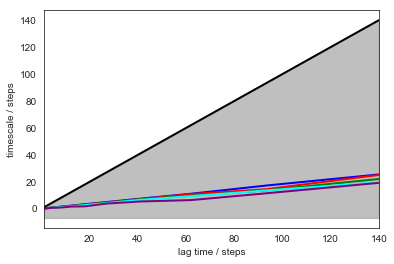

In [5]:
n_clusters = 6   # number of k-means clusters

clustering = coor.cluster_kmeans(X,k=n_clusters) # calculate clusters with kmeans
dtrajs = clustering.dtrajs
cc_x = clustering.clustercenters[:,0]
its = msm.timescales_msm(dtrajs, lags=200, nits=10)
# matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2)
# plt.xlim(0, 40); plt.ylim(0, 120);
# plt.show()

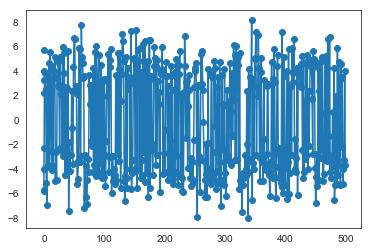

In [6]:
cc_x = clustering.clustercenters[:,0]
plt.plot(X[::1000],'-o')
plt.scatter(np.zeros_like(cc_x),cc_x)

In [7]:
its = msm.timescales_msm(dtrajs, lags=20, nits=10)

estimating MaximumLikelihoodMSM: 100% (7/7) [######################] eta 00:01 \24-10-18 11:04:29 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[2] WARNING  Changed user setting nits to the number of available timescales nits=5


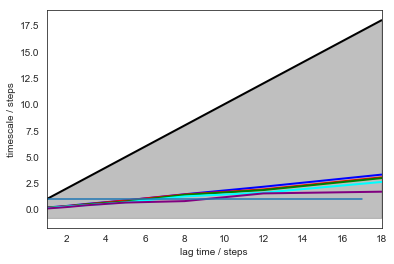

In [13]:
# plt.ylim((0,10))
# plt.xlim((0,10))

mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2)
# plt.ylim((0,10))
plt.plot(np.mean(np.diff(s))/2*np.ones(18))
# plt.xlim((0,10))

In [12]:
np.mean(np.diff(s))/2 * np.ones_like(its)

1.0051665976446749

In [11]:
its.shape

AttributeError: 'ImpliedTimescales' object has no attribute 'shape'

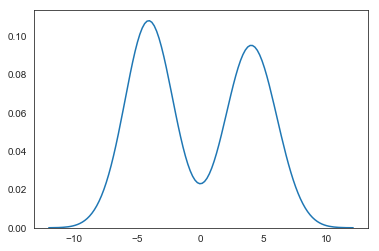

In [10]:
sns.kdeplot(X[::1000])

How much time does it take until a crossing event?

In [9]:
s  = [i for i,x in enumerate(X[:-1]) if X[i]*X[i+1]<0]

What is the mean time of crossing?

In [10]:
np.mean(np.diff(s))/its.get_timescales()[-1][0]

0.80166147115450836

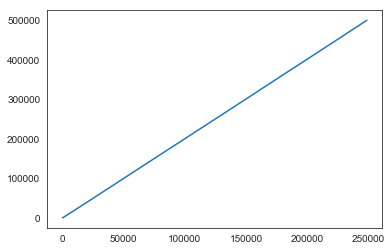

In [9]:
plt.plot(s)

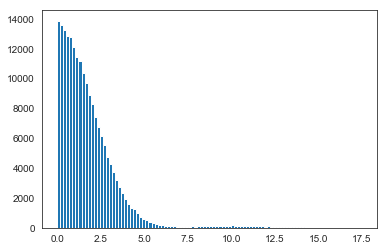

In [33]:
h = plt.hist(np.abs(np.diff(X)),100)

In [17]:
np.mean(np.abs(np.diff(X)))

4.7687684241776198

In [16]:
its.get_timescales()[-1][0]

3.3263238549969758